# Medical Cost Personal Insurance Datasets
Problem Statement:
Insurance Forecast by using Regression Algorithms

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

Columns                                            

·age: age of primary beneficiary

·sex: insurance contractor gender, female, male

·bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

·children: Number of children covered by health insurance / Number of dependents

·smoker: Smoking

·region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

·charges: Individual medical costs billed by health insurance

Predict : Charges  Can you accurately predict insurance costs?

Downlaod Files:
https://github.com/dsrscientist/dataset4
https://github.com/dsrscientist/dataset4/blob/main/medical_cost_insurance.csv

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ,LabelEncoder
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

#df =pd.read_csv('medical_cost_insurance.csv')
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
df.info()
print()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB



age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [3]:
print("Data details\n",df.shape)
print("\n")

print("All Columns \n ",df.columns)
print("\n")

print("Check for null values\n",df.isnull().sum())
print("\n")

print("Confirm null \n",df.isnull().sum().sum())
print("\n")

Data details
 (1338, 7)


All Columns 
  Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


Check for null values
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Confirm null 
 0




In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Observations:

1.count is same for all columns hence no null values present

2.Mean > Median for columns (Rightly skewed): 'age','bmi..however they are close to normal distribution as the difference is small
    
3.> difference between 75% && max for columns: 'bmi'..so outliers can exist

In [5]:
df.describe(include=['O'])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


Observations:

count is same -->no null values present

Unique values--> in columns: sex : 2, smoker :2, region : 4
                
Mode of columns-->sex : male, smoker :no, region : southeast
            
Frequency of mode value of columns---> sex : 676, smoker :1064, region: 364

# Data Visualization

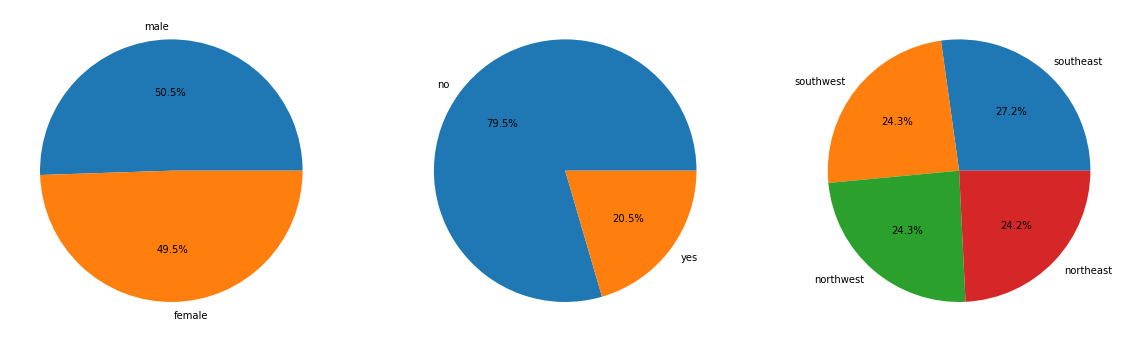

In [6]:
features =['sex','smoker','region']

plt.subplots(figsize=(20,10))
for i , col in enumerate(features):
    plt.subplot(1,3,i+1)
    
    x= df[col].value_counts()
    plt.pie(x.values,labels=x.index,autopct='%1.1f%%')
plt.show()

The data provided to us is equally distributed among the sex and the region columns but in the smoker column,
we can observe a ratio of 80:20.

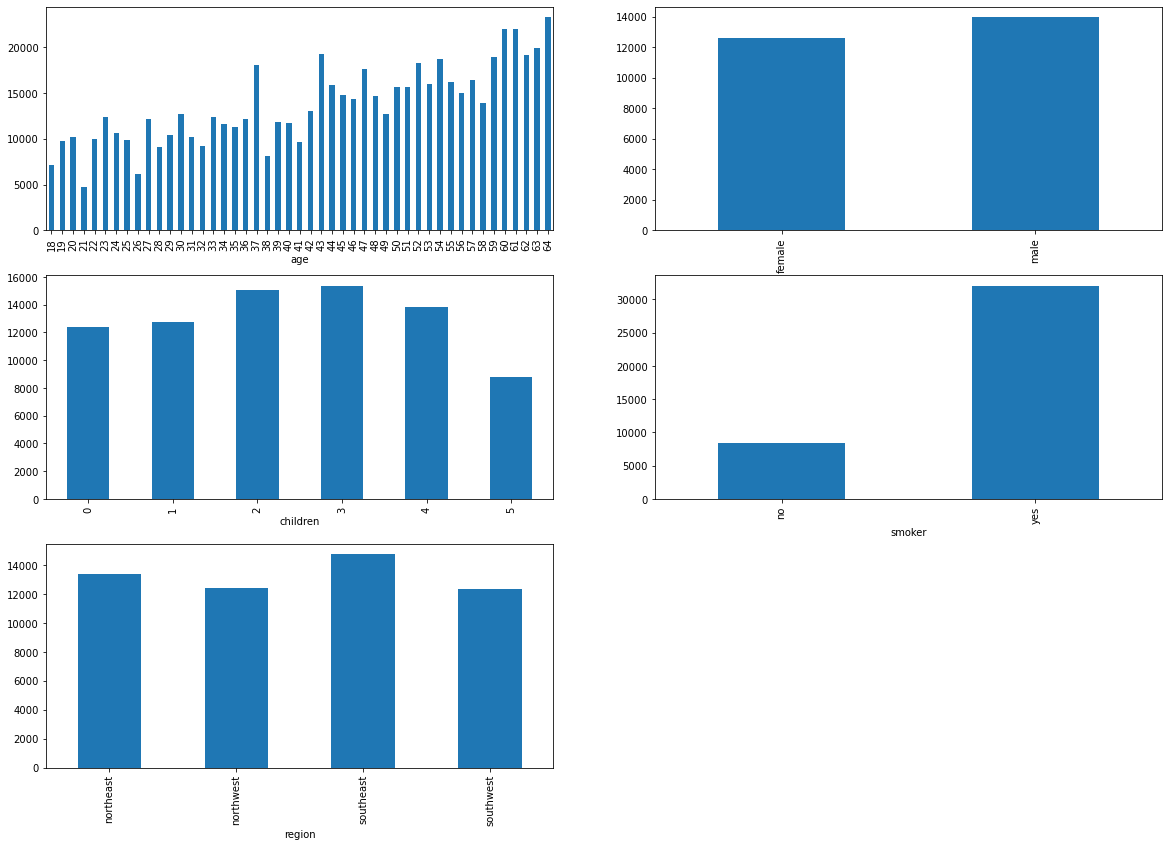

In [7]:
features = ['age','sex','children','smoker','region']
plt.subplots(figsize=(20,14))
for i, col in enumerate(features):
    plt.subplot(3,2,i+1)
    df.groupby(col).mean()['charges'].plot.bar()
plt.show()

Observations

Charges are on the higher side for males  but the difference is not that much.

Premium charged from the smoker is around thrice charged from non-smokers.

Charges are approximately the same in the given four regions.

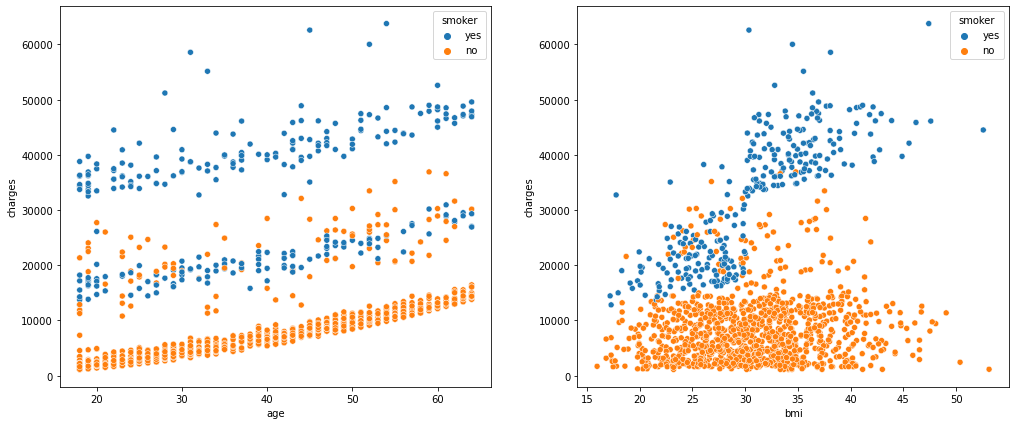

In [8]:
features = ['age','bmi']
plt.subplots(figsize=(17,7))
for i ,col in enumerate(features):
    plt.subplot(1,2,i+1)
    sns.scatterplot(data=df,x=col,y='charges',hue='smoker')
plt.show()

observation

premium prices increase with increase in age of a person 

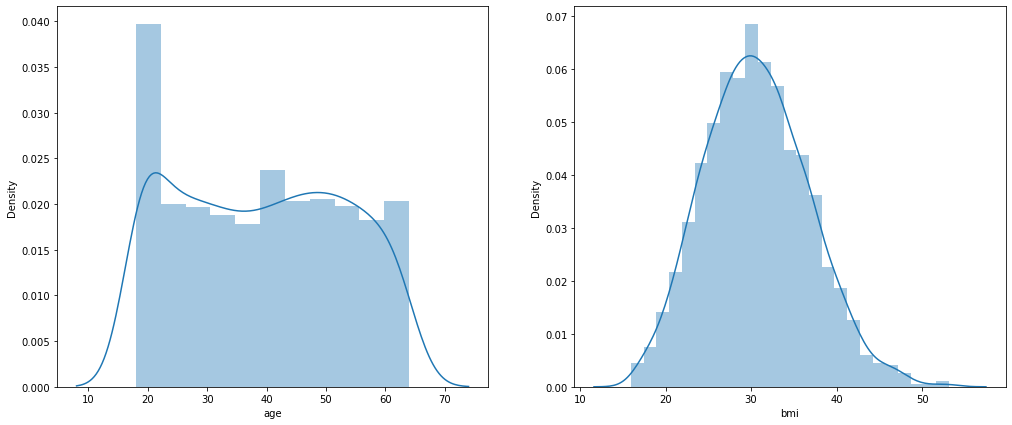

In [9]:
features =['age','bmi']

plt.subplots(figsize=(17,7))
for i , col in enumerate(features):
    plt.subplot(1,2,i+1)
    sns.distplot(df[col])
    
plt.show()

The data of Age is not normalized.

Distribution is out of the normalized curve.

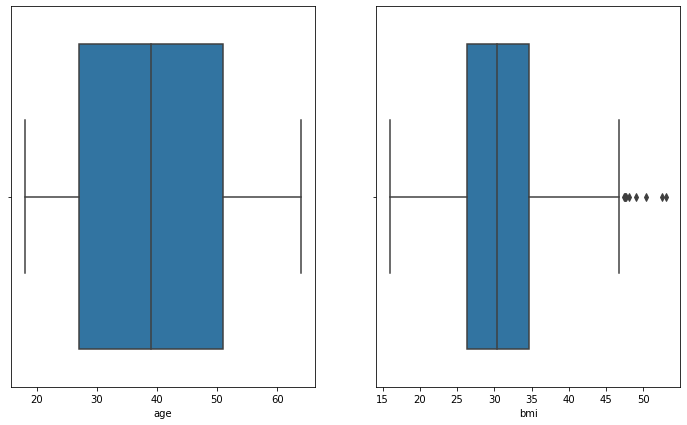

In [10]:
features = ['age','bmi']
plt.subplots(figsize=(12,7))

for i, col in enumerate(features):
    plt.subplot(1,2,i+1)
    sns.boxplot(df[col])

plt.show()

outliers exist in the BMI column of the given dataset.

we need to remove those outliers for BMI column

Value count of sex
male      676
female    662
Name: sex, dtype: int64

Value count of children
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Value count of smoker
no     1064
yes     274
Name: smoker, dtype: int64

Value count of region
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64



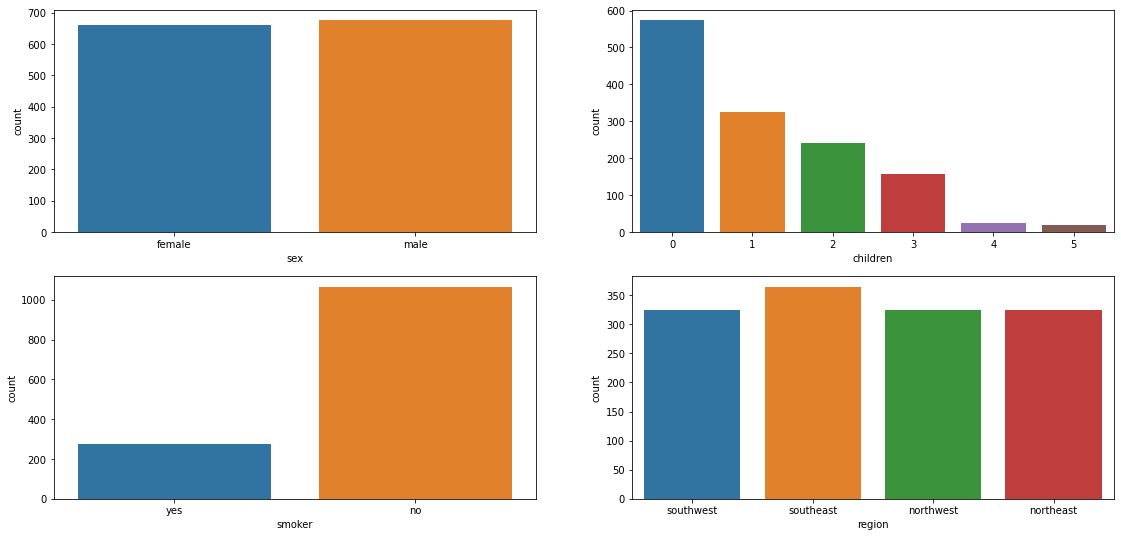

In [11]:
features =['sex','children','smoker','region']

plt.subplots(figsize=(19,9))
for i , col in enumerate(features):
    print("Value count of",features[i])
    print(df[col].value_counts())
    print()
    plt.subplot(2,2,i+1)
    sns.countplot(df[col])
    
plt.show()

# Observations: 

Total no. of males are 676 and the total no. of females are 662

Total no. of 0 dependents: 1, 
Total no. of 1 dependent: 324, 
Total no. of 2 dependents: 240, Total no. of 3 dependents: 157, Total no. of 4 dependents: 25, Total no. of 5 dependents: 18
                
Total no. of Smoker "yes" are 274 and the total no. of "no" smokers are 1064

# Label Encoding of Categorical Data

In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype == object:
        df[col] = le.fit_transform(df[col])

df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


# Check for correlation of data

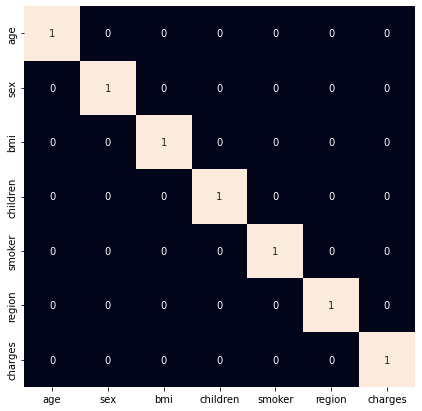

In [14]:
plt.figure(figsize =(7,7))

sns.heatmap(df.corr() > 0.8, annot =True, cbar =False)
plt.show()


From the above heatmap, it is certain that there are no highly correlated features in it.

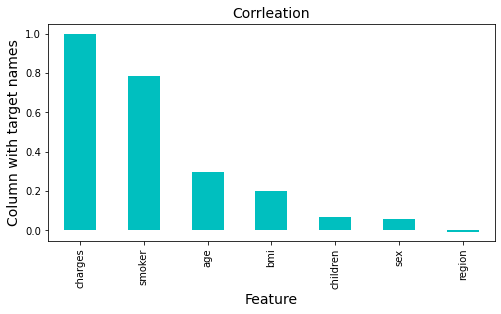

In [15]:
corr_r=df.corr()
plt.figure(figsize=(8,4))
corr_r["charges"].sort_values(ascending=False).plot(kind="bar",color="c")
plt.xlabel("Feature",fontsize=14)
plt.ylabel("Column with target names",fontsize=14)
plt.title("Corrleation",fontsize=14)
plt.show()

Observations: (Correlation of Target variable with features)

"region" has almost zero correlation with target variable "charges" Max correlation: smoker Min correlation: age

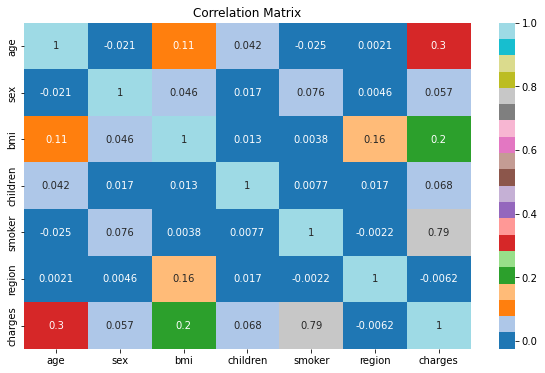

In [16]:
corr_r=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_r,cmap="tab20",annot=True)
plt.title("Correlation Matrix")
plt.show()

# Data Pre-Processing

In [17]:
print("Columns \n",df.columns)
features=df.drop("charges",axis=1)
display(features)
print("\n")
target=df["charges"]
display(target)

Columns 
 Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

# Verify Skewness 

In [18]:
df.skew().sort_values(ascending=False)

charges     1.515880
smoker      1.464766
children    0.938380
bmi         0.284047
age         0.055673
sex        -0.020951
region     -0.038101
dtype: float64

Observations: 
    
Skewness range: (+0.28,-0.28)

Below are the variables age ,bmi--> Continuous sex,children,smoker, region -->Categorical

charges -->Target Variable --> Max skewness @ bmi: 0.284047 -->Min skewness @ age: 0.055673 ------> We don't remove skewness for X categorical columns and for target variable

In [19]:
df.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
age,0.055673,-1.245088
sex,-0.020951,-2.002557
bmi,0.284047,-0.050732
children,0.938380,0.202454
smoker,1.464766,0.145756
region,-0.038101,-1.327702
charges,1.515880,1.606299


skewness can be interpreted

Fairly Symmetrical -0.5 to 0.5

Moderate Skewed -0.5 to -1.0 and 0.5 to 1.0

Highly Skewed < -1.0 and > 1.0

# Checking Outliers

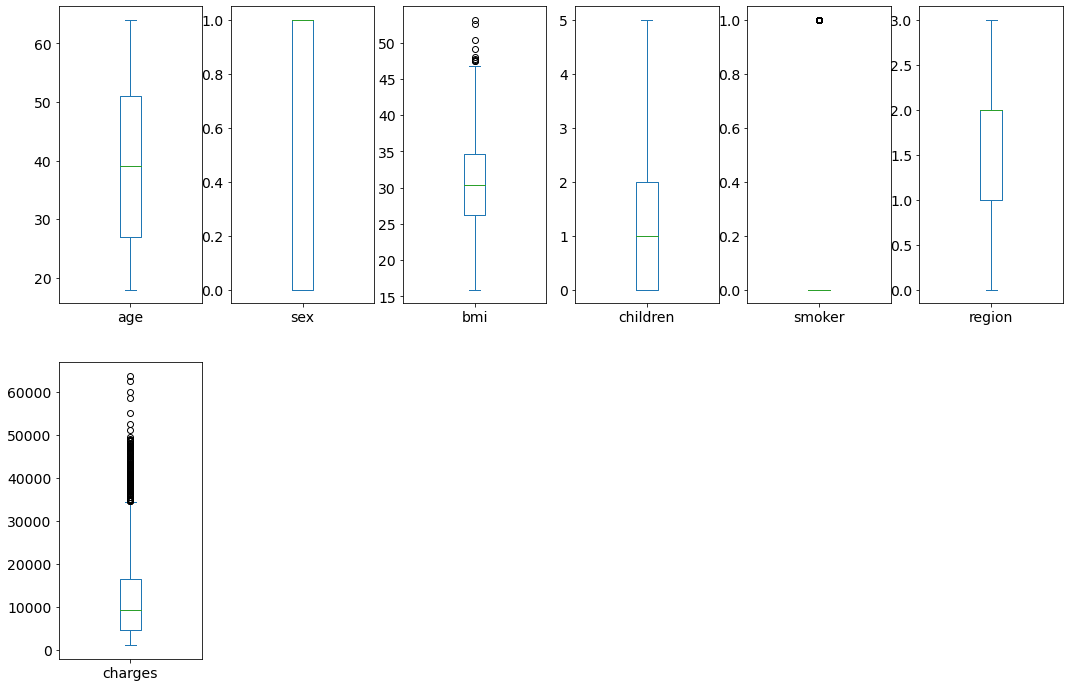

In [20]:
df.plot(kind="box",subplots=True,layout=(2,6),fontsize=14,figsize=(18,12))
plt.show()

Observations: 

Outliers present in 'bmi'

# Removing Outliers

In [21]:
#Removing Outliers
from scipy.stats import zscore
z=np.abs(zscore(features))
threshold=3
np.where(z>3)

features.shape,target.shape
#print(len(features))

((1338, 6), (1338,))

In [22]:
features_new=features[(z<3).all(axis=1)]
target_new=target[(z<3).all(axis=1)]
#print(len(features_new))
features=features_new
target=target_new

(np.abs(zscore(features))<3).all().all()
features.shape,target.shape

((1316, 6), (1316,))

In [23]:
loss_percent=(len(df)-len(features_new))/len(df)*100
loss_percent

1.6442451420029895

Observations: 

Data loss is less than 10% hence it is acceptable

# Transforming data to remove skewness

In [24]:
# Method1: Using BoxCox Method
from scipy.stats import boxcox
x1=pd.DataFrame()
x1['age']=boxcox(features['age'],0)
x1['bmi']=boxcox(features['bmi'],0)
x1

,age,bmi
0,2.944439,3.328627
1,2.890372,3.519573
2,3.332205,3.496508
3,3.496508,3.122585
4,3.465736,3.363149
...,...,...
1311,3.912023,3.433019
1312,2.890372,3.463233
1313,2.890372,3.606856
1314,3.044522,3.250374


In [25]:
x1.skew().sort_values(ascending=False)

bmi   -0.307966
age   -0.378323
dtype: float64

Observations: 

Skewness range: (+0.38,-0.38)

charges 1.515880 smoker 1.464766 children 0.938380 bmi 0.284047 age 0.055673 sex -0.020951 region -0.038101

In [26]:
# Method2: Log transformation using numpy
import numpy as np
x2=pd.DataFrame()
x2['age']=np.log(features['age'])
x2['bmi']=np.log(features['bmi'])
#x2.head(10)
x2.skew().sort_values(ascending=False)

bmi   -0.307966
age   -0.378323
dtype: float64

In [27]:
# Method 3: Using PowerTransformer
x3_n=features.drop(["sex","children","smoker","region"],axis=1)
x3_n

,age,bmi
0,19,27.900
1,18,33.770
2,28,33.000
3,33,22.705
4,32,28.880
...,...,...
1333,50,30.970
1334,18,31.920
1335,18,36.850
1336,21,25.800


In [28]:
# Method 3: Using PowerTransformer

from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
x_new_pt=pt.fit_transform(x3_n)
x_3=pd.DataFrame(data=x_new_pt,columns=x3_n.columns)
x_3.skew().sort_values(ascending=False)

bmi   -0.012546
age   -0.101915
dtype: float64

Observations: Skewness range: (+0.1,-0.1)

In [29]:
x_3

,age,bmi
0,-1.525474,-0.419803
1,-1.616848,0.555771
2,-0.767728,0.432095
3,-0.385137,-1.357505
4,-0.459889,-0.251355
...,...,...
1311,0.782259,0.100105
1312,-1.616848,0.256569
1313,-1.616848,1.039060
1314,-1.347657,-0.789294


In [30]:
features

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [31]:
features.drop(["age","bmi"],axis=1,inplace=True)
new_features=features
new_features
print(features.index.values)
print()
print(new_features.index.values)

new_features["index"]=x_3.index.values

new_features.set_index("index",inplace=True)
new_features

upd_features = new_features.join(x_3)
upd_features


[   0    1    2 ... 1335 1336 1337]

[   0    1    2 ... 1335 1336 1337]


,sex,children,smoker,region,age,bmi
index,,,,,,
0,0,0,1,3,-1.525474,-0.419803
1,1,1,0,2,-1.616848,0.555771
2,1,3,0,2,-0.767728,0.432095
3,1,0,0,1,-0.385137,-1.357505
4,1,0,0,1,-0.459889,-0.251355
...,...,...,...,...,...,...
1311,1,3,0,1,0.782259,0.100105
1312,0,0,0,0,-1.616848,0.256569
1313,0,0,0,2,-1.616848,1.039060


# Scaling data

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features=scaler.fit_transform(upd_features)
features

features.shape,target.shape

((1316, 6), (1316,))

# Build Model 

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

lr=LinearRegression()

for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At randome state",i, " the model performs well")
        print("At randome state:",i)
        print("Training accuracy is",r2_score(y_train,pred_train)*100)
        print("Testing accuracy is",r2_score(y_test,pred_test)*100)
        print("Difference between Training and Testing accuracy is",(r2_score(y_test,pred_test)*100)-(r2_score(y_train,pred_train)*100))
        print("\n")

At randome state 63  the model performs well
At randome state: 63
Training accuracy is 74.87553480657736
Testing accuracy is 74.87860073866142
Difference between Training and Testing accuracy is 0.0030659320840555893


At randome state 414  the model performs well
At randome state: 414
Training accuracy is 74.9004524097314
Testing accuracy is 74.8998253318325
Difference between Training and Testing accuracy is -0.0006270778988977099


At randome state 491  the model performs well
At randome state: 491
Training accuracy is 74.88043097014585
Testing accuracy is 74.87668937170277
Difference between Training and Testing accuracy is -0.0037415984430850813




Observations: 

As multple random states give same training and testing accuarcy scores
selected random state: 414

In [34]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=414)
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print("r2_Score from LinearRegression-->",r2_score(y_test,pred_test))

r2_Score from LinearRegression--> 0.748998253318325


# Cross Validation(CV) for Linear Regression

In [35]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection  import cross_val_score
lss=r2_score(y_test,pred_lr)
for j in range(2,11):
    lsscore=cross_val_score(lr,features,target,cv=j)
    lsc=lsscore.mean()
    print(" At CV:",j)
    print("Cross validation score is:",lsc*100)
    print("Model_score is:",lss*100)
    print("Difference b/w Cross validation score and Model accuracy score is",lsc-lss)
    print("\n") 

 At CV: 2
Cross validation score is: 74.69230209323102
Model_score is: 74.8998253318325
Difference b/w Cross validation score and Model accuracy score is -0.0020752323860148136


 At CV: 3
Cross validation score is: 74.33809722319319
Model_score is: 74.8998253318325
Difference b/w Cross validation score and Model accuracy score is -0.005617281086393144


 At CV: 4
Cross validation score is: 74.43621473149503
Model_score is: 74.8998253318325
Difference b/w Cross validation score and Model accuracy score is -0.004636106003374829


 At CV: 5
Cross validation score is: 74.5424892191151
Model_score is: 74.8998253318325
Difference b/w Cross validation score and Model accuracy score is -0.0035733611271741017


 At CV: 6
Cross validation score is: 74.41110706208859
Model_score is: 74.8998253318325
Difference b/w Cross validation score and Model accuracy score is -0.004887182697439152


 At CV: 7
Cross validation score is: 74.44480746259516
Model_score is: 74.8998253318325
Difference b/w Cross 

Observations: 
    
At CV=5, Difference b/w Cross validation score and Model r2 score is less hence selected CV=5

In [36]:
lsscore_selected=cross_val_score(lr,features,target,cv=5).mean()
print("The CV score is:",lsscore_selected*100,"\nThe model score is:",lss*100)
print("Difference of CV score & model score is:",lss-lsscore_selected)

The CV score is: 74.5424892191151 
The model score is: 74.8998253318325
Difference of CV score & model score is: 0.0035733611271741017


# Few more Classification Algorithms

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor


models = [LinearRegression(),XGBRegressor(),RandomForestRegressor(),AdaBoostRegressor(),Lasso(),Ridge(),
         DecisionTreeRegressor(),KNeighborsRegressor(),SGDRegressor(),
         SVR(),ElasticNet(),GradientBoostingRegressor()]
Training_r2score =[]
Testing_r2score=[]
Diff_Train_Test_r2score =[]
mape_train =[]
mape_test =[]
Diff_mape_TrainTest =[]
model_score=[]
# MSE =[]
# RMSE=[]

for i in range(12):
    models[i].fit(x_train,y_train)
    
    print(f'{models[i]} :  ')
    pred_train = models[i].predict(x_train)
    pred_test= models[i].predict(x_test)
    #print("Training accuracy is",r2_score(y_train,pred_train)*100)
    Training_r2score.append(r2_score(y_train,pred_train)*100)
    #print("Testing accuracy is",r2_score(y_test,pred_test)*100)
    Testing_r2score.append(r2_score(y_test,pred_test)*100)
    #print("Difference between Training and Testing accuracy is",(r2_score(y_test,pred_test)*100)-(r2_score(y_train,pred_train)*100))
    Diff_Train_Test_r2score.append((r2_score(y_test,pred_test)*100)-(r2_score(y_train,pred_train)*100))
    #print("\n")
    # mean_absolute_percentage_error as mape
    #print('Training Error :', mape(y_train,pred_train))
    mape_train.append(mape(y_train,pred_train))
    #pred_val = models[i].predict(x_val)
    #print('Validation error :',mape(y_test,pred_test))
    mape_test.append(mape(y_test,pred_test))
    #print("Difference between Training and Validation error is",(mape(y_train,pred_train)*100)-(mape(y_test,pred_test)*100))
    Diff_mape_TrainTest.append((mape(y_train,pred_train)*100)-(mape(y_test,pred_test)*100))
    #print("\n")
    
    # predicting score
    modelscore = models[i].score(x_test,y_test)
    #print('score of model is : ',modelscore)
    model_score.append(modelscore)


ModelsMetrics_list = {'ModelAlgo':models,'Training_r2score':Training_r2score,'Testing_r2score':Testing_r2score,'Diff_Train_Test_r2score':Diff_Train_Test_r2score,'mape_train':mape_train,'mape_test':mape_test,'Diff_mape_TrainTest':Diff_mape_TrainTest,'model_score':model_score}

dfModels_metrics = pd.DataFrame(ModelsMetrics_list,columns =['ModelAlgo','Training_r2score','Testing_r2score','Diff_Train_Test_r2score','mape_train','mape_test', 'Diff_mape_TrainTest','model_score'])
                                                                                                                                                                  
dfModels_metrics

LinearRegression() :  
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...) :  
RandomForestRegressor() :  
AdaBoostRegressor() :  
Lasso() :  
Ridge() :  
DecisionTreeRegressor() :  
KNeighborsRegressor() :  
SGDRegressor() :  
SVR() :  
ElasticNet() :  
GradientBoostingRegressor() :  


,ModelAlgo,Training_r2score,Testing_r2score,Diff_Train_Test_r2score,mape_train,mape_test,Diff_mape_TrainTest,model_score
0,LinearRegression(),74.900452,74.899825,-0.000627,0.424126,0.418241,0.588447,0.748998
1,"XGBRegressor(base_score=0.5, booster='gbtree',...",99.494754,80.826503,-18.668252,0.064932,0.404595,-33.966259,0.808265
2,"(DecisionTreeRegressor(max_features=1.0, rando...",97.557325,84.269671,-13.287654,0.119936,0.351308,-23.137191,0.842697
3,"(DecisionTreeRegressor(max_depth=3, random_sta...",83.591508,81.397546,-2.193963,0.643286,0.637484,0.580131,0.813975
4,Lasso(),74.900448,74.900983,0.000535,0.424079,0.418227,0.585179,0.749010
5,Ridge(),74.900385,74.902169,0.001784,0.424301,0.418554,0.574704,0.749022
6,DecisionTreeRegressor(),99.833059,65.841575,-33.991484,0.008617,0.482019,-47.340285,0.658416
7,KNeighborsRegressor(),87.481640,80.239238,-7.242402,0.276938,0.345738,-6.879946,0.802392
8,SGDRegressor(),74.899845,74.911186,0.011341,0.422959,0.417321,0.563785,0.749112
9,SVR(),-9.650174,-11.329525,-1.679351,1.038754,0.937390,10.136339,-0.113295


In [38]:
cvscore =[]
modelscore=[]
Diff_cv_model_score =[]
for i in range(12):    
    print(f'{models[i]} :  ')
    pred_val = models[i].predict(x_test)
    lss=r2_score(y_test,pred_val)
    lsscore_selected=cross_val_score(models[i],features,target,cv=5).mean()
    #print("The CV score is:",lsscore_selected*100,"\nThe model score is:",lss*100)
    cvscore.append(lsscore_selected*100)
    modelscore.append(lss*100)
    #print("Difference is:",lss-lsscore_selected)
    Diff_cv_model_score.append(lss-lsscore_selected)
    #print("\n")

cvmodel_list = {'ModelAlgo':models,'cvscore':cvscore,'modelscore':modelscore,'Diff_cv_model_score':Diff_cv_model_score}

dfcvmodel_score = pd.DataFrame(cvmodel_list,columns =['ModelAlgo','cvscore','modelscore','Diff_cv_model_score'])
                                                                                                                                                                  
dfcvmodel_score

LinearRegression() :  
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...) :  
RandomForestRegressor() :  
AdaBoostRegressor() :  
Lasso() :  
Ridge() :  
DecisionTreeRegressor() :  
KNeighborsRegressor() :  
SGDRegressor() :  
SVR() :  
ElasticNet() :  
GradientBoostingRegressor() :  


,ModelAlgo,cvscore,modelscore,Diff_cv_model_score
0,LinearRegression(),74.542489,74.899825,0.003573
1,"XGBRegressor(base_score=0.5, booster='gbtree',...",80.285618,80.826503,0.005409
2,"(DecisionTreeRegressor(max_features=1.0, rando...",83.322700,84.269671,0.009470
3,"(DecisionTreeRegressor(max_depth=3, random_sta...",82.144516,81.397546,-0.007470
4,Lasso(),74.542933,74.900983,0.003581
5,Ridge(),74.543034,74.902169,0.003591
6,DecisionTreeRegressor(),68.574891,65.841575,-0.027333
7,KNeighborsRegressor(),80.182800,80.239238,0.000564
8,SGDRegressor(),74.549041,74.911186,0.003621
9,SVR(),-9.958607,-11.329525,-0.013709


Observations:

Conclusion
Out of all the models RandomForestRegressor  is giving the least value for the mean absolute percentage error this means
predictions made by this model are close to the real values as compared to the other model.

Here we have used MAPE which is the Mean Absolute Percentage Error metric to evaluate the model’s performance. 
A 0.1 value of MAPE means that the error in the predictions from the actual value will be around 10%.

Out of all algorithms checked, 
RandomForestRegressor is selected for hyper parameter tuning as the 
difference between model and cross-validation score is less


# Hyper Parameter Tuning

In [39]:
#Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],
           'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)
print(clf.best_params_['criterion'])
print(clf.best_params_['max_features'])



{'criterion': 'mse', 'max_features': 'sqrt'}
mse
sqrt


In [40]:
rf=RandomForestRegressor(criterion=clf.best_params_['criterion'],max_features=clf.best_params_['max_features'])
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print("R2 Score:",rfs*100)

rfscore=cross_val_score(rf,features,target,cv=5)
rfc=rfscore.mean()
print("Cross Val Score:",rfc*100)
print("Difference is:",r2_score(y_test,pred_decision)-rfc)


R2 Score: 84.69448001714805
Cross Val Score: 84.01613481443654
Difference is: 0.006783452027115167


In [41]:
# models = [LinearRegression(),XGBRegressor(),RandomForestRegressor(),AdaBoostRegressor(),Lasso(),Ridge(),
#          DecisionTreeRegressor(),KNeighborsRegressor(),SGDRegressor(),
#          SVR(),ElasticNet(),GradientBoostingRegressor()]
#models[2] ===RandomForestRegressor()
x_predict = list(models[2].predict(x_test))
predicted_df = {'predicted_values': x_predict, 'original_values': y_test}
#creating new dataframe
pd.DataFrame(predicted_df).head(20)

,predicted_values,original_values
281,48414.006007,48549.17835
164,9315.265762,5028.14660
565,2470.708649,2128.43105
1156,39121.259812,39722.74620
1043,3618.448935,3161.45400
1111,42509.598872,41949.24410
57,35664.147972,34303.16720
560,9516.828625,9193.83850
687,5871.788684,5438.74910
1122,47683.012467,46661.44240


Text(0, 0.5, 'Predicted Y')

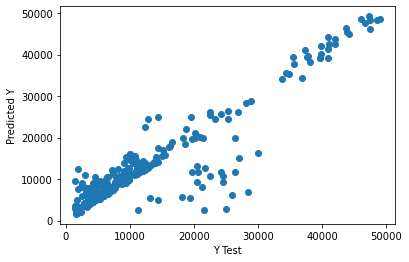

In [42]:
plt.scatter(y_test,x_predict)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [43]:
#Predict for new customer
data ={'age' : 40,
        'sex' : 1,
        'bmi' : 45.50,
        'children' : 4,
        'smoker' : 0,
        'region' : 3}
index = [1]
newcust_df = pd.DataFrame(data,index)
newcust_df


,age,sex,bmi,children,smoker,region
1,40,1,45.5,4,0,3


In [44]:
#Predict for new customer
#models[2] ===RandomForestRegressor()
medical_charges_predict =models[2].predict(newcust_df)
print(medical_charges_predict)


[47576.0240567]


# Save Model

In [45]:
# models = [LinearRegression(),XGBRegressor(),RandomForestRegressor(),AdaBoostRegressor(),Lasso(),Ridge(),
#          DecisionTreeRegressor(),KNeighborsRegressor(),SGDRegressor(),
#          SVR(),ElasticNet(),GradientBoostingRegressor()]
#models[2] ===RandomForestRegressor()
import pickle
file = 'MedicalInsuranceCost'
save = pickle.dump(models[2],open('models_medical.pkl','wb'))


# Conclusion

In [46]:
#models[2] ===RandomForestRegressor()
pickled_model_medical = pickle.load(open('models_medical.pkl','rb'))
result=pickled_model_medical.score(x_test,y_test)
print(result)

conclusion=pd.DataFrame([pickled_model_medical.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion.T

0.8426967126451312


,Predicted,Original
0,48414.006007,48549.17835
1,9315.265762,5028.14660
2,2470.708649,2128.43105
3,39121.259812,39722.74620
4,3618.448935,3161.45400
...,...,...
259,3253.630220,3378.91000
260,14622.822285,10959.69470
261,22130.270718,18767.73770
262,4936.199502,4399.73100
